In [1]:
import pandas as pd
data = pd.read_csv("/content/data.csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         11 non-null     object 
 1   Age                10 non-null     float64
 2   Gender             10 non-null     object 
 3   MaritalStatus      10 non-null     object 
 4   AnnualIncome       10 non-null     float64
 5   TotalPurchases     10 non-null     float64
 6   PreferredCategory  10 non-null     object 
dtypes: float64(3), object(4)
memory usage: 744.0+ bytes
None
  CustomerID   Age  Gender MaritalStatus  AnnualIncome  TotalPurchases  \
0       1001  33.0    Male       Married       65000.0            18.0   
1       1002  28.0  Female        Single       45000.0            15.0   
2       1003  42.0    Male        Single       55000.0            20.0   
3       1004  51.0  Female       Married       80000.0            12.0   
4       1005  37.0    Male      Di

In [2]:
# Check for and handle missing values
data.isnull().sum()
# Check for and remove duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
data[['Age', 'AnnualIncome', 'TotalPurchases']] = scaler.fit_transform(data[['Age', 'AnnualIncome', 'TotalPurchases']])

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['PreferredCategory'] = label_encoder.fit_transform(data['PreferredCategory'])


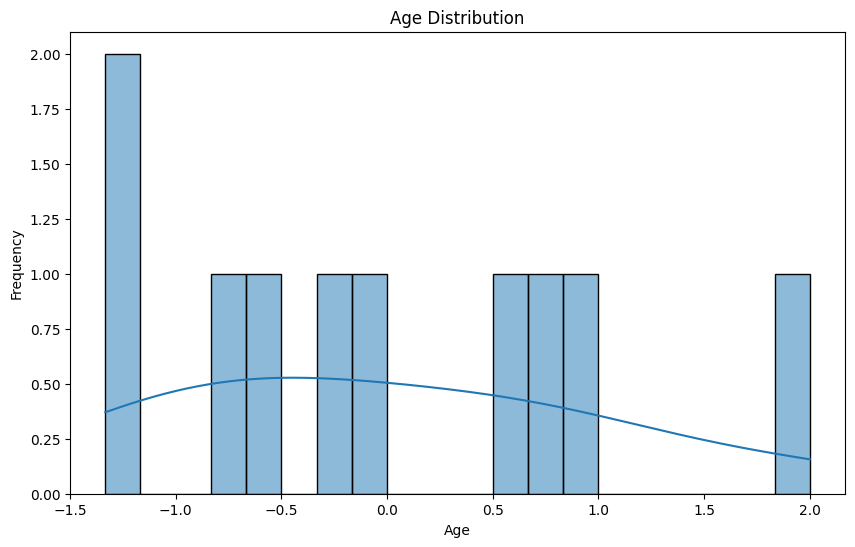

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#  exploratory data analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


CustomerID           0
Age                  0
Gender               0
MaritalStatus        0
AnnualIncome         0
TotalPurchases       0
PreferredCategory    0
Cluster              0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


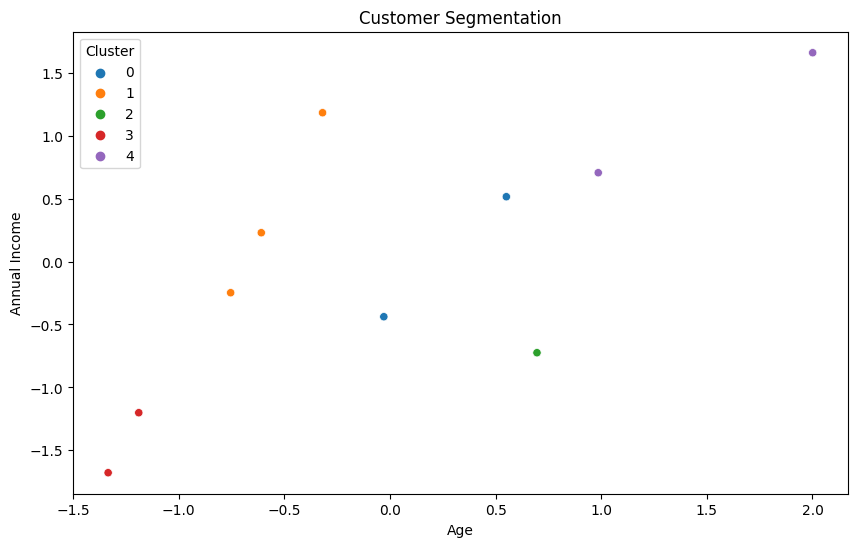

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data.drop_duplicates(inplace=True)
print(data.isnull().sum())
scaler = StandardScaler()
data[['Age', 'AnnualIncome', 'TotalPurchases']] = scaler.fit_transform(data[['Age', 'AnnualIncome', 'TotalPurchases']])

data.dropna(inplace=True)

# Choose the number of clusters (K) for customer segmentation
num_clusters = 5

# Select relevant features for clustering
features_for_clustering = data[['Age', 'AnnualIncome', 'TotalPurchases']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_for_clustering)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AnnualIncome', data=data, hue='Cluster', palette='tab10')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


In [9]:
pip install pandas dash plotly scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [12]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Step 6: Dashboard Creation and Deployment
# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("TechElectro Inc. - Customer Segmentation Dashboard"),

    dcc.Graph(id='scatter-plot'),

    dcc.Dropdown(
        id='cluster-dropdown',
        options=[{'label': f'Cluster {i}', 'value': i} for i in data['Cluster'].unique()],
        value=data['Cluster'].unique()[0],
        multi=False
    ),

    html.Div(id='cluster-info'),
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('cluster-dropdown', 'value')]
)
def update_scatter_plot(selected_cluster):
    filtered_data = data[data['Cluster'] == selected_cluster]
    fig = px.scatter(filtered_data, x='Age', y='AnnualIncome', color='PreferredCategory', hover_name='CustomerID')
    return fig

@app.callback(
    Output('cluster-info', 'children'),
    [Input('cluster-dropdown', 'value')]
)
def update_cluster_info(selected_cluster):
    cluster_data = data[data['Cluster'] == selected_cluster]
    cluster_size = len(cluster_data)
    cluster_avg_age = cluster_data['Age'].mean()
    cluster_avg_income = cluster_data['AnnualIncome'].mean()
    return f"Cluster Size: {cluster_size} | Avg. Age: {cluster_avg_age:.2f} | Avg. Annual Income: {cluster_avg_income:.2f}"

if __name__ == '__main__':
    app.run_server(debug=True)


CustomerID           0
Age                  0
Gender               0
MaritalStatus        0
AnnualIncome         0
TotalPurchases       0
PreferredCategory    0
Cluster              0
dtype: int64


<IPython.core.display.Javascript object>